In [1]:

from google.colab import files
files.upload()

Saving data2.csv to data2.csv


{'data2.csv': b'Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Yield(%),PE,P/B,OCF/PAT,Ev/EBITDA,M/Sales\r\n3I Infotech Ltd.,5140.00,42.22,19.73,45.95,25.44,1.28,3.69,6.85,4.24,0.91,1.18,6.03,0.46\r\n3M India Ltd.,2383.00,27.09,16.00,40.33,60.43,3.67,0.04,0.00,38.60,7.56,0.53,22.44,3.56\r\nABB India Ltd.,12574.00,5.65,1.91,5.23,11.19,2.33,0.00,0.50,120.78,6.98,3.49,52.96,2.73\r\nAbbott India Ltd.,2074.00,20.22,11.68,42.25,65.30,2.59,0.00,2.59,21.74,5.22,0.76,11.85,1.84\r\nAccelya Solutions India Ltd.,442.00,41.03,19.22,31.87,36.90,2.59,0.02,4.86,7.49,1.37,1.26,3.81,1.10\r\nAegis Logistics Ltd.,3622.00,9.81,5.20,40.69,40.65,7.77,0.89,2.76,20.68,4.26,0.06,12.46,1.80\r\nAGC Networks Ltd.,2590.00,73.49,41.83,78.30,119.78,8.29,0.00,13.02,10.00,1.33,0.71,3.31,0.62\r\nAgro Tech Foods Ltd.,1441.00,9.61,8.83,38.77,57.84,5.38,0.00,0.94,29.03,4.84,-1.33,17.59,1.12\r\nAkzo Nobel India Ltd.,2194.00,38.59,29.40,33.95,42.56,1.65,0.00,4.36,9

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [3]:
data = pd.read_csv('data2.csv')

In [4]:
data.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Yield(%),PE,P/B,OCF/PAT,Ev/EBITDA,M/Sales
0,3I Infotech Ltd.,5140.00,42.22,19.73,45.95,25.44,1.28,3.69,6.85,4.24,0.91,1.18,6.03,0.46
1,3M India Ltd.,2383.00,27.09,16.00,40.33,60.43,3.67,0.04,0.00,38.60,7.56,0.53,22.44,3.56
2,ABB India Ltd.,12574.00,5.65,1.91,5.23,11.19,2.33,0.00,0.50,120.78,6.98,3.49,52.96,2.73
3,Abbott India Ltd.,2074.00,20.22,11.68,42.25,65.30,2.59,0.00,2.59,21.74,5.22,0.76,11.85,1.84
4,Accelya Solutions India Ltd.,442.00,41.03,19.22,31.87,36.90,2.59,0.02,4.86,7.49,1.37,1.26,3.81,1.10


In [5]:
test = data.iloc[:,:]

In [6]:
data = data.replace( ' -   ', np.nan)

In [7]:
data['Net Sales'] = data['Net Sales'].astype('float64')

In [8]:
data.dtypes

Company Name             object
Net Sales               float64
PBIDTM (%)              float64
PATM (%)                float64
ROE (%)                 float64
ROCE (%)                float64
Asset Turnover(x)       float64
Total Debt/Equity(x)    float64
Dividend Yield(%)       float64
PE                      float64
P/B                     float64
OCF/PAT                 float64
Ev/EBITDA               float64
M/Sales                 float64
dtype: object

In [ ]:
#data.drop(labels='Company Name', axis=1, inplace=True)

In [9]:
data.iloc[:,1:] = data.iloc[:,1:].astype('float64')

In [10]:
data.fillna(data.mean(), inplace=True)

In [11]:
len(data.columns)

14

# **Ev/EBITDA Prediction**

In [12]:
data1 = data.iloc[:,:13 ]

In [13]:
data1.head()


,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Yield(%),PE,P/B,OCF/PAT,Ev/EBITDA
0,3I Infotech Ltd.,5140.0,42.22,19.73,45.95,25.44,1.28,3.69,6.85,4.24,0.91,1.18,6.03
1,3M India Ltd.,2383.0,27.09,16.00,40.33,60.43,3.67,0.04,0.00,38.60,7.56,0.53,22.44
2,ABB India Ltd.,12574.0,5.65,1.91,5.23,11.19,2.33,0.00,0.50,120.78,6.98,3.49,52.96
3,Abbott India Ltd.,2074.0,20.22,11.68,42.25,65.30,2.59,0.00,2.59,21.74,5.22,0.76,11.85
4,Accelya Solutions India Ltd.,442.0,41.03,19.22,31.87,36.90,2.59,0.02,4.86,7.49,1.37,1.26,3.81


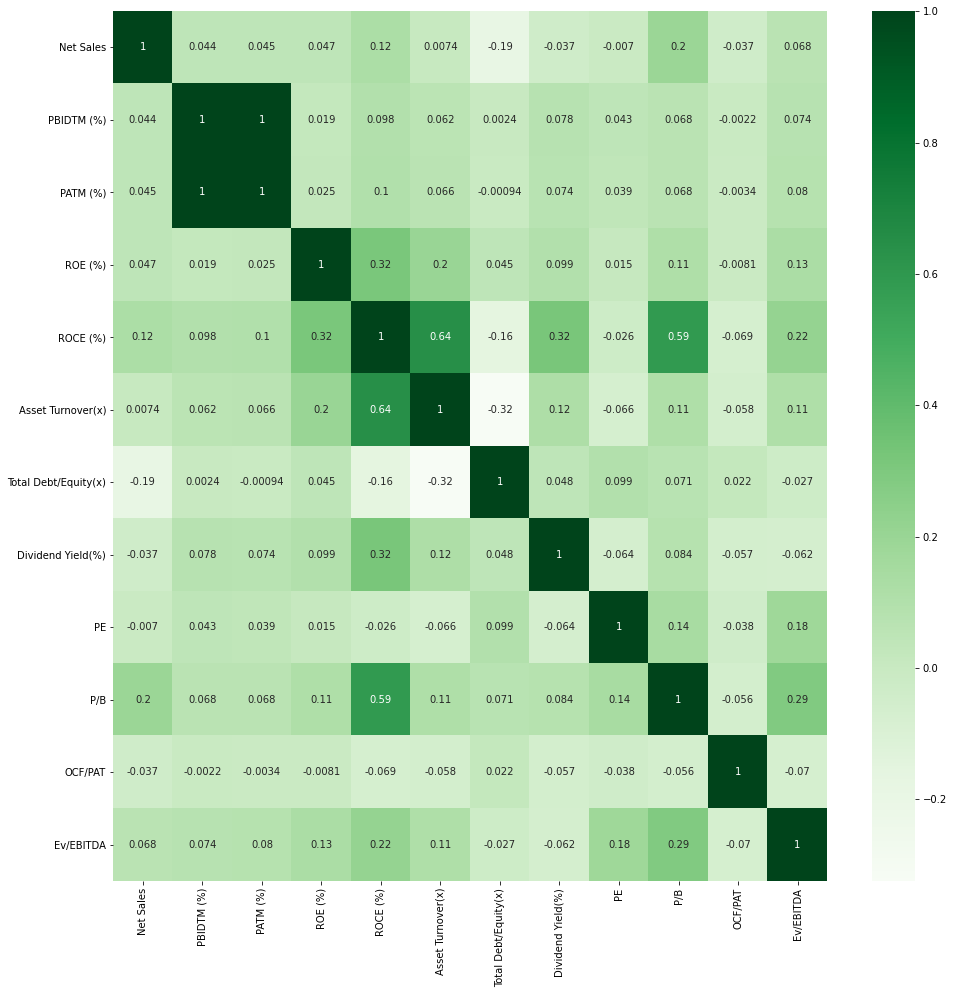

In [14]:
plt.figure(figsize=(16,16))
cor = data1.corr()
sns.heatmap(cor, annot=True, cmap='Greens')
plt.show()

In [15]:
cor_target = abs(cor["Ev/EBITDA"])
relevant_features = cor_target[cor_target>0.1]
relevant_features.index

Index(['ROE (%)', 'ROCE (%)', 'Asset Turnover(x)', 'PE', 'P/B', 'Ev/EBITDA'], dtype='object')

In [16]:
X,y = data1[['ROE (%)', 'ROCE (%)', 'Asset Turnover(x)', 'PE', 'P/B']], data1['Ev/EBITDA']

In [17]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [18]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [21]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [23]:
from sklearn.metrics import mean_squared_error
for r,p in zip(reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:20s}    {:.10f}'.format(r, mean_squared_error(y_test.values, p),))

LassoCV                 40.8691197543
XGBRegressor            176.3199017993
RidgeCV                 43.1970761996
BayesianRidge           37.6550144515
ARDRegression           42.2917460045
ElasticNetCV            38.8195558789
LassoLarsCV             50.8200790684
SVR                     20.9780895192


In [ ]:
#data1['PE'].plot.kde()

# **M/Sales Prediction**

In [29]:
data2 = data.iloc[:,: ].drop('Ev/EBITDA', axis=1)

In [30]:
data2.head()

,Company Name,Net Sales,PBIDTM (%),PATM (%),ROE (%),ROCE (%),Asset Turnover(x),Total Debt/Equity(x),Dividend Yield(%),PE,P/B,OCF/PAT,M/Sales
0,3I Infotech Ltd.,5140.0,42.22,19.73,45.95,25.44,1.28,3.69,6.85,4.24,0.91,1.18,0.46
1,3M India Ltd.,2383.0,27.09,16.00,40.33,60.43,3.67,0.04,0.00,38.60,7.56,0.53,3.56
2,ABB India Ltd.,12574.0,5.65,1.91,5.23,11.19,2.33,0.00,0.50,120.78,6.98,3.49,2.73
3,Abbott India Ltd.,2074.0,20.22,11.68,42.25,65.30,2.59,0.00,2.59,21.74,5.22,0.76,1.84
4,Accelya Solutions India Ltd.,442.0,41.03,19.22,31.87,36.90,2.59,0.02,4.86,7.49,1.37,1.26,1.10


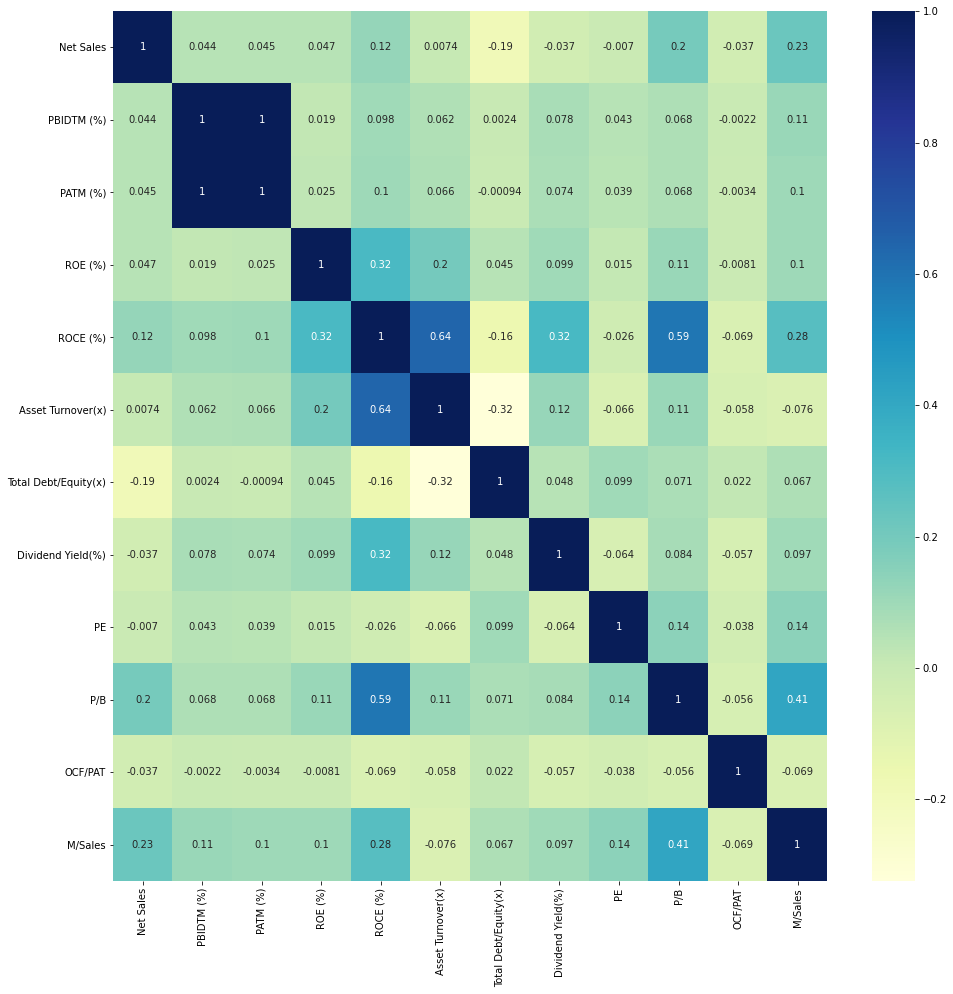

In [31]:
plt.figure(figsize=(16,16))
cor = data2.corr()
sns.heatmap(cor, annot=True, cmap='YlGnBu')
plt.show()

In [37]:
cor_target = abs(cor["M/Sales"])
relevant_features = cor_target[cor_target>0.11]
relevant_features.index

Index(['Net Sales', 'PBIDTM (%)', 'ROCE (%)', 'PE', 'P/B', 'M/Sales'], dtype='object')

In [38]:
X,y = data2[['Net Sales', 'PBIDTM (%)', 'ROCE (%)', 'PE', 'P/B']], data2['M/Sales']

In [39]:
from sklearn.preprocessing import StandardScaler
sc_X = StandardScaler()
X = sc_X.fit_transform(X)

In [40]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,random_state = 42)

In [42]:
from sklearn.linear_model import LassoCV
import xgboost as xgb
from sklearn.linear_model import RidgeCV
from sklearn.linear_model import BayesianRidge
from sklearn.linear_model import ARDRegression
from sklearn.linear_model import ElasticNetCV
from sklearn.linear_model import LassoLarsCV
from sklearn.svm import SVR
l=[LassoCV(cv=5, random_state=0),
    xgb.XGBRegressor(objective ='reg:squarederror', colsample_bytree = 0.3, learning_rate = 0.1, alpha = 10, n_estimators = 500),
    RidgeCV(alphas=[1e-3, 1e-2, 1e-1, 1]),
    BayesianRidge(compute_score=True),
    ARDRegression(),
    ElasticNetCV(cv=10, random_state=42),
    LassoLarsCV(cv=5),
    SVR(kernel='rbf', C=100, gamma=0.1, epsilon=.1)
]
reg_name = ['LassoCV', 'XGBRegressor', 'RidgeCV', 'BayesianRidge', 'ARDRegression',
            'ElasticNetCV', 'LassoLarsCV', 'SVR']
pred_list = []
for i in l:
    i.fit(X_train,y_train)
    #print(i)
    pred_list.append(i.predict(X_test))

In [44]:
from sklearn.metrics import mean_squared_error
for r,p in zip(reg_name,pred_list):
    #print(r,'\t',mean_squared_error(y_test.values, p))
    
    print('{:20s}    {:.10f}'.format(r, mean_squared_error(y_test.values, p),))

LassoCV                 1.9077997947
XGBRegressor            1.3153990621
RidgeCV                 2.3092395099
BayesianRidge           2.0637580105
ARDRegression           2.1673307329
ElasticNetCV            1.8949979982
LassoLarsCV             2.4756167236
SVR                     1.7566347556


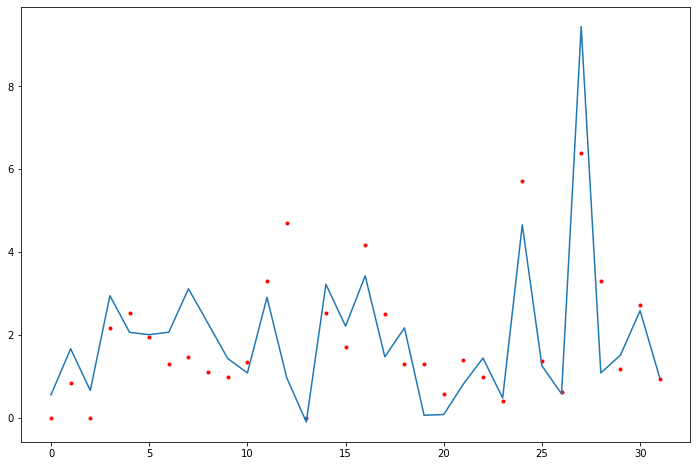

In [47]:
plt.subplots(figsize=(12,8))
plt.plot(range(y_test.shape[0]),y_test,'.r')
plt.plot([i for i in range(len(pred_list[1]))], pred_list[1])
